# Mobile Price Classification - Zenius Final Project

Dataset URL : https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

Data Description:
- `battery_power`<code>&nbsp;</code>: Total energy a battery can store in one time measured in mAh
- `blue`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has bluetooth or not
- `clock_speed`<code>&nbsp;&nbsp;&nbsp;</code>: Speed at which microprocessor executes instructions
- `dual_sim`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has dual sim support or not
- `fc`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Front Camera mega pixels
- `four_g`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has 4G or not
- `int_memory`<code>&nbsp;&nbsp;&nbsp;&nbsp;</code>: Internal Memory in Gigabytes
- `m_dep`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Mobile Depth in cm
- `mobile_wt`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Weight of mobile phone
- `n_cores`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Number of cores of processor
- `pc`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Primary Camera mega pixels
- `px_height`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Pixel Resolution Height
- `px_width`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Pixel Resolution Width
- `ram`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Random Access Memory in Megabytes
- `sc_h`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Screen Height of mobile in cm
- `sc_w`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Screen Width of mobile in cm
- `talk_time`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: longest time that a single battery charge will last when you are
- `three_g`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has 3G or not
- `touch_screen`<code>&nbsp;&nbsp;</code>: Has touch screen or not
- `wifi`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has wifi or not
- `price_range`<code>&nbsp;&nbsp;&nbsp;</code>: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost). `(Target Feature)`

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataframe Initialization

In [2]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Exploratory Data Analysis (EDA)

### Data Cleaning

In [3]:
# Check for missing values
df.isnull().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [4]:
# Check for duplicate values
df.duplicated().any()

False

Tidak terdapat data yang kosong maupun duplikat

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Semua kolom berbentuk numerik (integer atau float)

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### Visualisasi Data tiap fitur

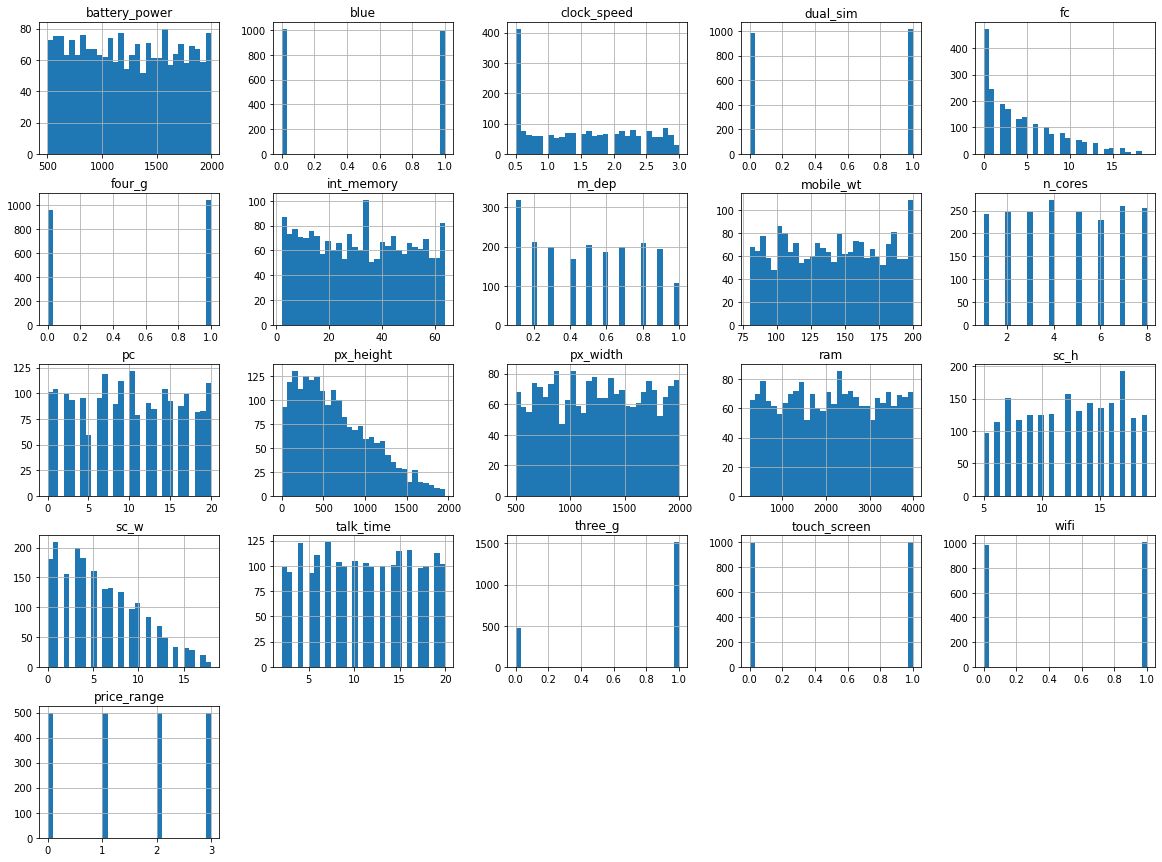

In [7]:
df.hist(figsize=(20,15), bins=30)
plt.show()

 - Dari visualisasi diatas dapat perkirakan bahwa kolom `fc` memiliki outliers

In [8]:
# Loop through each column and check for outliers
for i in range (len(df.columns)):
  q_1, q_3 = np.percentile(df[df.columns[i]], [25, 75])
  iqr = q_3 - q_1
  fLow = q_1 - (1.5 * iqr)
  fHigh = q_3 + (1.5 * iqr)
  outliers = df[df.columns[i]][(
      (df[df.columns[i]] < (fLow)) | (df[df.columns[i]] > (fHigh)))]
  if outliers.max() > 0:
    df = df.loc[(df[df.columns[i]] >= (fLow)) & (df[df.columns[i]] <= (fHigh))]
    print(f'{df.columns[i]} : ')
    print('number of outliers: '+ str(len(outliers))+ ' (drop)')
    print('max outlier value: '+ str(outliers.max()))
    print('min outlier value: '+ str(outliers.min()))
  if outliers.max() == 0:
    print(f'{df.columns[i]} : ')
    print('number of outliers: '+ str(len(outliers)))
    print('max outlier value: '+ str(outliers.max()))
    print('min outlier value: '+ str(outliers.min()))

fc : 
number of outliers: 18 (drop)
max outlier value: 19
min outlier value: 17
px_height : 
number of outliers: 2 (drop)
max outlier value: 1960
min outlier value: 1949
three_g : 
number of outliers: 474
max outlier value: 0
min outlier value: 0


In [9]:
dfClean = df
df = pd.read_csv('train.csv')
print('Row Droped :',len(df) - len(dfClean))

Row Droped : 20


- Outliers pada kolom `three_g` diabaikan karena data tersebut masih masuk akal.
- Baris yang memiliki outliers Pada kolom `fc` dan `px_height` di drop karena data tersebut tidak masuk akal dan total kolom yang didrop hanya <b>1%</b> dari keseluruhan total data.

<AxesSubplot:ylabel='px_height'>

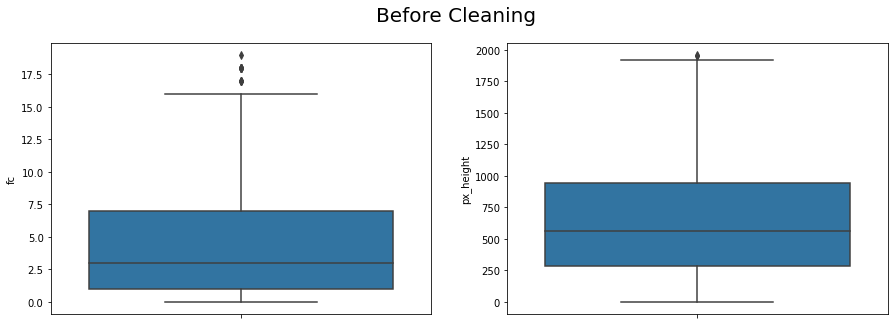

In [10]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Before Cleaning', fontsize=20)
sns.boxplot(y='fc', data=df, ax=axs[0])
sns.boxplot(y='px_height', data=df, ax=axs[1])

<AxesSubplot:ylabel='px_height'>

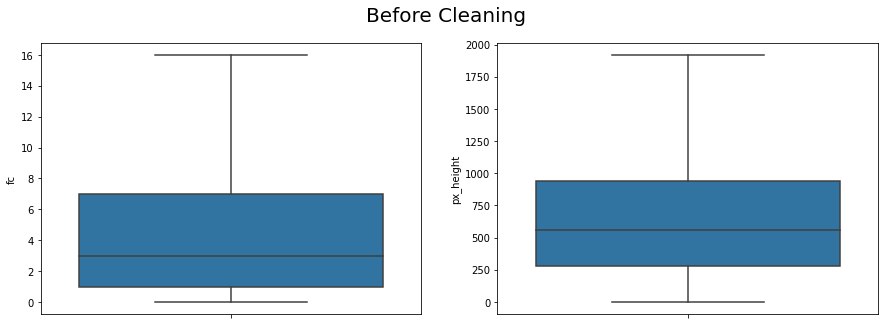

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Before Cleaning', fontsize=20)
sns.boxplot(y='fc', data=dfClean, ax=axs[0])
sns.boxplot(y='px_height', data=dfClean, ax=axs[1])

### Separate Continuous and Categorical Features

In [12]:
for column_name in dfClean.columns:
    unique_values = len(dfClean[column_name].unique())
    print(f'Feature {column_name} has {unique_values} unique values')

Feature battery_power has 1092 unique values
Feature blue has 2 unique values
Feature clock_speed has 26 unique values
Feature dual_sim has 2 unique values
Feature fc has 17 unique values
Feature four_g has 2 unique values
Feature int_memory has 63 unique values
Feature m_dep has 10 unique values
Feature mobile_wt has 121 unique values
Feature n_cores has 8 unique values
Feature pc has 21 unique values
Feature px_height has 1130 unique values
Feature px_width has 1105 unique values
Feature ram has 1546 unique values
Feature sc_h has 15 unique values
Feature sc_w has 19 unique values
Feature talk_time has 19 unique values
Feature three_g has 2 unique values
Feature touch_screen has 2 unique values
Feature wifi has 2 unique values
Feature price_range has 4 unique values


- Categorical data has 1 to 5 unique values.

In [13]:
catFeatures = list()
conFeatures = list()
for column_name in dfClean.columns:
    unique_values = len(dfClean[column_name].unique())
    if unique_values < 6:
      catFeatures.append(column_name)
    else:
      conFeatures.append(column_name)

#### Categorical Features

In [14]:
print('Categorical Features :')
for i in range (len(catFeatures)):
    print(catFeatures[i])

Categorical Features :
blue
dual_sim
four_g
three_g
touch_screen
wifi
price_range


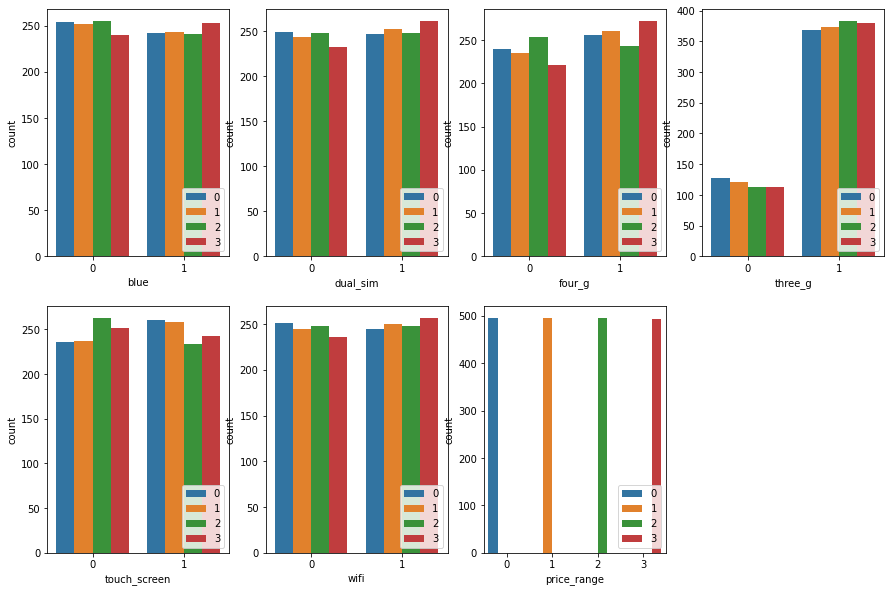

In [15]:
i = 1
plt.figure(figsize=(15,10))
for cat in catFeatures:
  plt.subplot(2,4,i)
  sns.countplot(x=cat, data=dfClean, hue= 'price_range')
  plt.legend(loc='lower right')
  i +=1

#### Continuous Features

In [16]:
print('Continuous Features :')
for i in range(len(conFeatures)):
    print(conFeatures[i])


Continuous Features :
battery_power
clock_speed
fc
int_memory
m_dep
mobile_wt
n_cores
pc
px_height
px_width
ram
sc_h
sc_w
talk_time


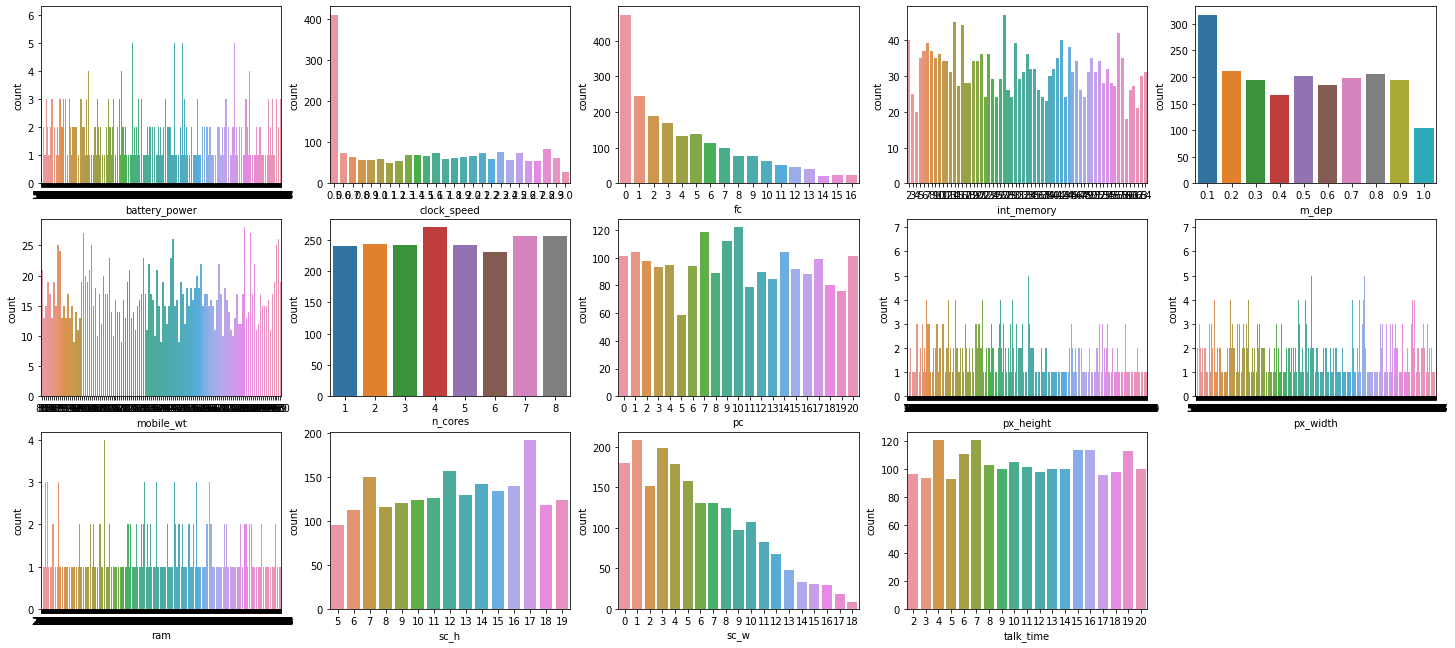

In [17]:
i = 1
plt.figure(figsize=(25,15))
for con in conFeatures:
  plt.subplot(4,5,i)
  sns.countplot(x=con, data=dfClean)
  i +=1

Kesimpulan dari visualisasi

- Pada data kategorikal, distribusi data terlihat merata
- Fitur `fc` terlihat bahwa handphone yang memiliki kamera depan dengan megapixel besar hanya sedikit
- Pada fitur `sc_w`, hanya sedikit handphone yang memiliki layar yang lebar
- Grafik pada `clock_speed` menunjukan bahwa masih banyak handphone yang memiliki kecepatan processor yang rendah

#### Data Kontinu vs Kontinu

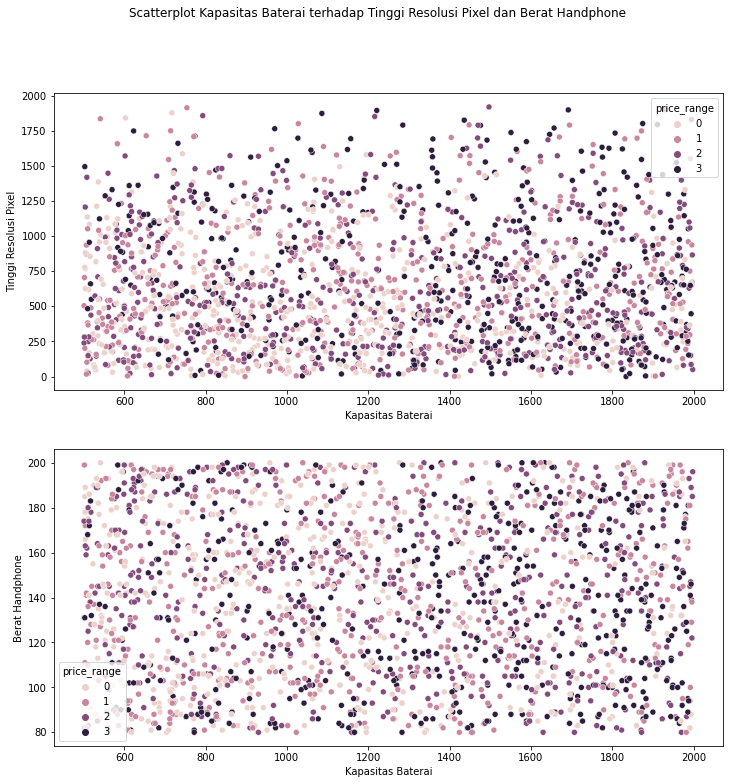

<Figure size 432x288 with 0 Axes>

In [18]:
fig, axs = plt.subplots(2, figsize=(12, 12))
fig.suptitle('Scatterplot Kapasitas Baterai terhadap Tinggi Resolusi Pixel dan Berat Handphone')
fig = plt.figure()
a = sns.scatterplot(data=dfClean, x='battery_power', y='px_height', hue='price_range', ax=axs[0])
a.set_xlabel("Kapasitas Baterai")
a.set_ylabel("Tinggi Resolusi Pixel")
b = sns.scatterplot(data=dfClean, x='battery_power', y='mobile_wt', hue='price_range', ax=axs[1])
b.set_xlabel("Kapasitas Baterai")
b.set_ylabel("Berat Handphone")
plt.show()

Pada semua kategori harga mobile phone, kurang bisa digambarkan hubungan antara besar kapasitas baterai dengan berat mobile phone dan besar pixel kamera

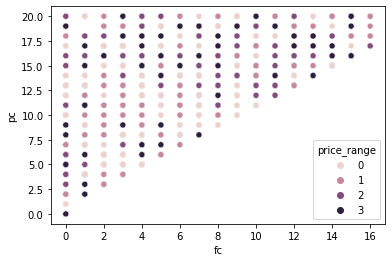

In [19]:
fig = plt.figure()
ax = sns.scatterplot(data=dfClean, x='fc', y='pc', hue='price_range')
plt.show()

Pada semua kategori harga mobile phone, semakin banyak pixel dari kamera utama maka semakin banyak juga pixel dari kamera depan mobile phone tersebut. Namun pada semua kategori harga tersebar secara merata

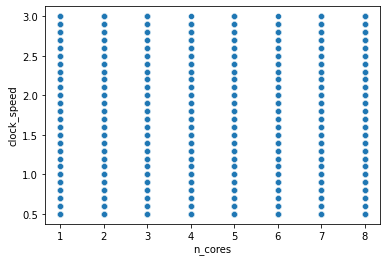

In [20]:
fig = plt.figure()
ax = sns.scatterplot(data=dfClean, y='clock_speed', x='n_cores')
plt.show()

persebaran data `n_cores` dan `clock_speed` terlihat merata

#### Kategori vs Kontinu

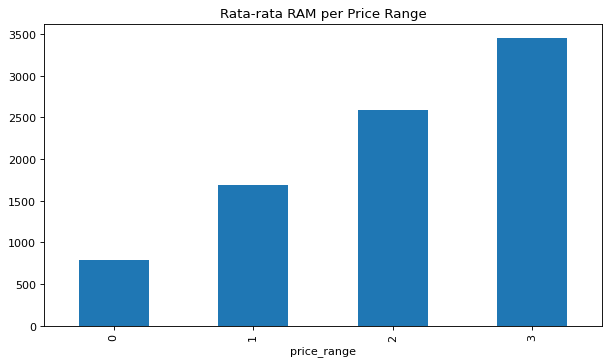

In [21]:
plt.figure(num=None, figsize=(9, 5), dpi=80, facecolor='w', edgecolor='k')
dfClean.groupby(['price_range'])['ram'].mean().plot(kind='bar')
plt.title('Rata-rata RAM per Price Range')
plt.show()

- Semakin tinggi harga mobile phone, semakin tinggi juga rata-rata kapasitas ram
- ini juga menunjukkan bahwa fitur `ram` memiliki keterkaitan yang bagus dengan label `price_range`

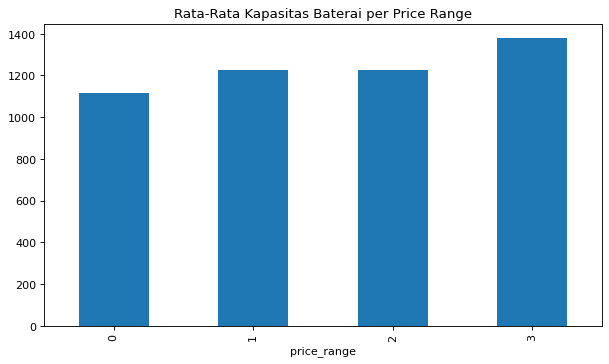

In [22]:
plt.figure(num=None, figsize=(9, 5), dpi=80, facecolor='w', edgecolor='k')
dfClean.groupby(['price_range'])['battery_power'].mean().plot(kind='bar')
plt.title('Rata-Rata Kapasitas Baterai per Price Range')
plt.show()

- tiap rentang harga rata-rata kapasitas baterai tidak memiliki kenaikan yang signifikan
- ini juga menunjukkan bahwa fitur `battery_power` memiliki keterkaitan yang kurang bagus dengan label `price_range`

### Features Correlation

<AxesSubplot:>

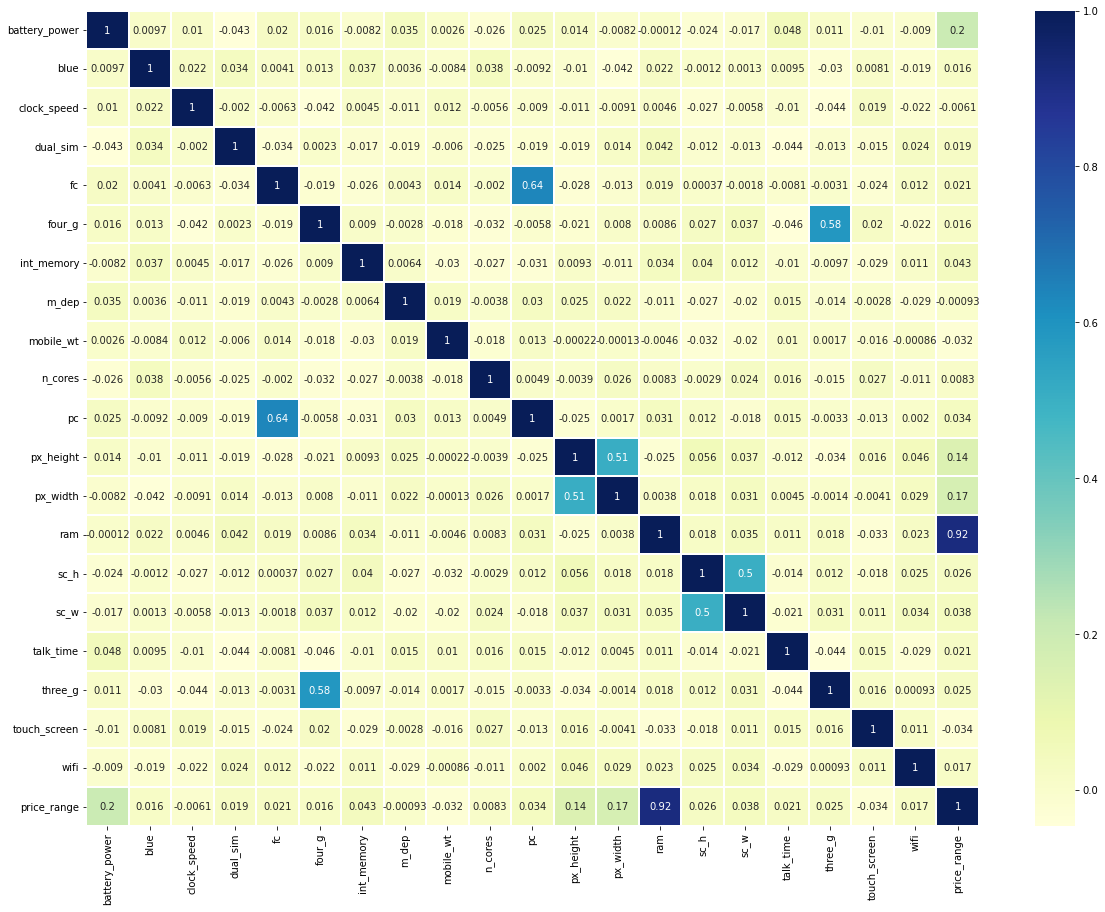

In [23]:
plt.figure(figsize=(20, 15))
sns.heatmap(dfClean.corr(), annot=True, cmap='YlGnBu', linewidths=0.2)

In [24]:
abs(dfClean.corr()['price_range']).sort_values(ascending=False)[0:11]

price_range      1.000000
ram              0.917009
battery_power    0.200763
px_width         0.165132
px_height        0.144277
int_memory       0.043458
sc_w             0.038076
touch_screen     0.033888
pc               0.033871
mobile_wt        0.031628
sc_h             0.025641
Name: price_range, dtype: float64

- Dari visualisasi diatas dapat disimpulkan bahwa hanya terdapat 1 fitur yang memiliki korelasi kuat dengan label yaitu `ram`.
- Pada pengujian ini dataset akan dipisah menjadi 2 yaitu dataset dengan semua fitur dan dataset dengan 10 fitur (50%) yang memiliki korelasi terbaik.

In [25]:
# Make new dataset with only high correlation features
dfFiltered = dfClean[['battery_power', 'touch_screen', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'price_range']]
dfFiltered.head()

,battery_power,touch_screen,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,price_range
0,842,0,7,188,2,20,756,2549,9,7,1
1,1021,1,53,136,6,905,1988,2631,17,3,2
2,563,1,41,145,6,1263,1716,2603,11,2,2
3,615,0,10,131,9,1216,1786,2769,16,8,2
4,1821,1,44,141,14,1208,1212,1411,8,2,1


In [26]:
# Export dataset to csv
dfFiltered.to_csv('filtered.csv', index=False)
dfClean.to_csv('original.csv', index=False)

dataset dengan semua fitur dinamakan `original.csv` dan dataset dengan setengah fitur dinamakan `filtered.csv`

machine learning modelling akan dilakukan pada `models.ipynb`